This main notebook is to connect the SciAnalysis to the perovskite work we are doing

In [1]:
import sys, os
import glob
import matplotlib.pylab as plt
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
# cloning the SciAnalysis repo for immediate use
# git clone https://github.com/CFN-softbio/SciAnalysis.git

# for users that has this already install, please just reference the repo
SciAnalysis_PATH='/Users/wenbinli/SciAnalysis'
SciAnalysis_PATH in sys.path or sys.path.append(SciAnalysis_PATH)


In [3]:
from SciAnalysis import tools
from SciAnalysis.XSAnalysis.Data import *
from SciAnalysis.XSAnalysis import Protocols

In [4]:
# from utils.giwaxs_calibration import Calibration, Mask

In [5]:
C1 = Calibration(wavelength_A=0.9184)
C1.set_image_size(981, height=1043) # Pilatus1M
C1.set_pixel_size(pixel_size_um=172.0)

C1.set_beam_position(585.5, 1043-433) #After moving closer on 3/18 evening
C1.set_distance(0.198) #450004


In [6]:
mask_dir = SciAnalysis_PATH + '/SciAnalysis/XSAnalysis/masks/'
mask = Mask(mask_dir+'Dectris/Pilatus800k_vertical_gaps-mask.png')
# mask.load(mask_dir+'NSLSII_11BM_CMS/Pilatus800k_CMS_badpixels-mask.png ')


In [7]:
mask.data

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [8]:

sci_data = Data2DScattering(calibration= C1, mask= mask, name = 'test')

In [9]:
# Checking and loading all the data and trying to output those using SciAnalysis Data functions

filepath = '/Users/wenbinli/Library/CloudStorage/Box-Box/BNL March 2022 Data/AMohite2/maxs/raw'

sci_data.load(infile = filepath +'/'+"FAPI_MACl_hum_light_4_113.6s_RH94.012_x-0.000_th0.200_1.00s_451095_maxs.tiff")


In [10]:
L=sci_data.circular_average()

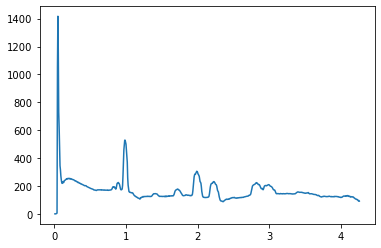

In [11]:
plt.plot(L.x,L.y)

In [12]:
# making a class for time series analysis 

print(C1.q_map_data.shape)

(1043, 981)


In [13]:
C1._generate_qxyz_maps()

In [14]:
C1.qr_map_data.shape

(1043, 981)

In [15]:
C1.qz_map_data.shape

(1043, 981)

In [16]:
# plt.figure(figsize = (9,8))
# plt.pcolor(C1.qr_map_data, C1.qz_map_data,np.log(image))
# # plt.pcolor(C1.qr_map_data, C1.qz_map_data,np.log(np.abs(image)))

# plt.xlim([0,2.2])
# plt.ylim([0,2.2])
# plt.clim([5.5,7.5])
# plt.colorbar()

In [17]:
data_name = filepath +'/'+"FAPI_MACl_hum_light_4_113.6s_RH94.012_x-0.000_th0.200_1.00s_451095_maxs.tiff"

val = Image.open(data_name)

image = abs(np.array(val))+1
image.shape

(1043, 981)

In [18]:
# import utils.giwaxs_figure as plotting

/var/folders/pq/jxt0134d0nq9pj748shhntzm0000gn/T/ipykernel_28466/3218854565.py:64: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  pc = ax.pcolor(cal.qr_map_data, cal.qz_map_data,giwaxs, cmap = 'jet', vmin =vmin, vmax = vmax)


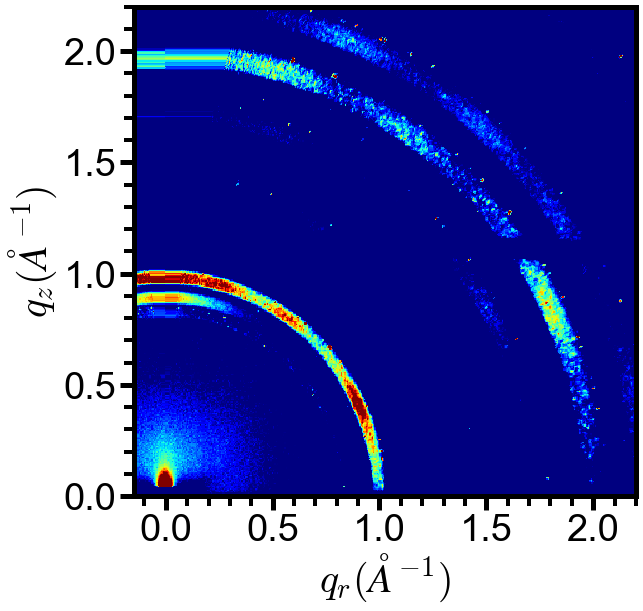

In [19]:
import matplotlib as mpl
mpl.rcParams["axes.linewidth"] = 5
mpl.rcParams["axes.labelsize"] = 40
mpl.rcParams["axes.labelweight"] = 'bold'
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['xtick.major.width'] = 5
mpl.rcParams['ytick.major.width'] = 5
mpl.rcParams['xtick.minor.width'] = 4
mpl.rcParams['ytick.minor.width'] = 4
mpl.rcParams['font.size'] = 38
mpl.rcParams["font.family"] = 'Arial'
mpl.rcParams["font.weight"] = 'normal'
mpl.rcParams['text.usetex'] = False


def plot_giwaxs(SciAnalysis_PATH, cal, mask, image_file, vmin, vmax):
    '''
    This function is for making the plotting for the GIWAXS image in python

    INPUTS:
        SciAnalysis_Path - the path where the SciAnalysis package is downloaded
        cal - a SciAnalysis object where the GIWAXS experimental parameters are kept
        mask - a SciAnalysis object of the mask file used in the experiment
        image_file - the GIWAXS pattern of interest
    Outputs:
        GIWAXS_fig - a matplotlib figure object which contain the GIWAXS image in q space
    '''
    SciAnalysis_PATH in sys.path or sys.path.append(SciAnalysis_PATH)
    
    # importing the SciAnalysis package
    from SciAnalysis import tools
    from matplotlib import colors
    from matplotlib import ticker
    from matplotlib.ticker import AutoMinorLocator
    # from SciAnalysis.XSAnalysis.Data import *
    # from SciAnalysis.XSAnalysis import Protocols

    # Sci_data = Data2DScatter(calibration = cal,mask= mask, name = 'plotting' )

    # Sci_data.load(infile = image_file)

    # loading the image using PIL
    data = Image.open(image_file)

    cal._generate_qxyz_maps()

    image = np.array(data)

    ##### Normalizing the image and then perform log
    # image = image/np.max(image)*100

    giwaxs = np.log(np.abs(image+11))
    giwaxs = giwaxs**2

    # print(image.data)
    # using the calibration file, we can extract the q maps specifically (Qr vs QZ)
    fig = plt.figure(figsize = (9,9))
    ax = fig.gca()
    # pc = ax.pcolor(cal.qr_map_data, cal.qz_map_data,giwaxs, cmap = 'plasma', norm= colors.Normalize(vmin= None, vmax = None))
    
    pc = ax.pcolor(cal.qr_map_data, cal.qz_map_data,giwaxs, cmap = 'jet', vmin =vmin, vmax = vmax)

    ax.set_xlim([-.15,2.2])
    ax.set_ylim([0,2.2])
    ax.set_yticks(np.arange(0,2.2,.5), fontweight = 'bold')
    ax.set_xticks(np.arange(0,2.2,.5),fontweight = 'bold')
    # fig.colorbar(pc, ax = ax)
    # ax.tick_params(axis='x', which='minor', bottom=True)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel("$q_r (\AA^{-1})$")
    ax.set_ylabel("$q_z (\AA^{-1})$")
    return None

plot_giwaxs(SciAnalysis_PATH=SciAnalysis_PATH, cal=C1, mask = mask, image_file=data_name, vmin = 35, vmax = 50)

/Users/wenbinli/degradation_analysis/utils/giwaxs_figure.py:68: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  pc = ax.pcolor(cal.qr_map_data, cal.qz_map_data,giwaxs, cmap = 'jet', vmin =vmin, vmax = vmax)


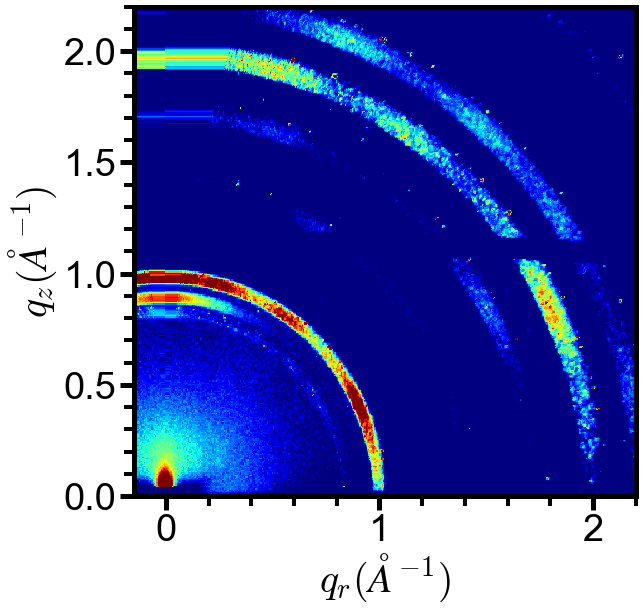

In [20]:
from utils.giwaxs_figure import plot_giwaxs

plot_giwaxs(SciAnalysis_PATH=SciAnalysis_PATH, cal=C1, mask = mask, image_file=data_name, vmin = 33, vmax = 48)

In [21]:
import scipy as sp
import numpy as np
import math as m
import matplotlib.pyplot as plt

from scipy.optimize import least_squares, minimize, fmin_slsqp


def fit_xrdV1(data, range, bg_range, parms,extra2, adapt, plot, background_linear = False):

    '''
    This function will be used to fit a varity of GIWAXS/XRD data using a
    pseudo-Voigt functions. It will take in a range of data points and try to
    use least squares (no constraints) with contraints to fit the function. The outputs will be the
    fitted parameters, the fitted data, the FWHM, the peak location and then
    the peak area.
    INPUT:
    OUTPUT:
    
    '''


    # this is to do the background subtraction

    # finding the start and end of an array for the 040 plane background
    x1_bg = np.where(abs(data[:,0]-bg_range[0])<= .01)
    ind1_bg = x1_bg[0][0]
    x2_bg = np.where(abs(data[:,0]-bg_range[1])<= .01)
    ind2_bg =x2_bg[0][0]

    # finding the start and end of an array for the 404 plane
    x1_111 = np.where(abs(data[:,0]-range[0])<= .01)
    ind1 = x1_111[0][0]
    x2_111 = np.where(abs(data[:,0]-range[1])<= .01)
    ind2 =x2_111[0][0]
    
    # get the difference in indices
    indices = np.concatenate((np.arange(ind1_bg, ind1),np.arange(ind2, ind2_bg)),axis = 0 )
    bg_data = data[indices,:]

    # fitting the background to an expotential curve (line if needed)
    bg_model = background_model(bg_data, int_guess= [1000, 10], linear = background_linear)
    # plotting_model(bg_data, bg_model)

    bg_model = sp.interpolate.interp1d(bg_data[:,0], bg_data[:,1])

    ydata = data[ind1:ind2,1] - bg_model(data[ind1:ind2,0])
    xdata = data[ind1:ind2,0]

    raw_data = np.concatenate((xdata.reshape(-1,1),ydata.reshape(-1,1)), axis = 1)

    
    intperfun = sp.interpolate.interp1d(xdata, ydata)

    # iterpolate the data so that the datafit has more point for a more meanful residual value
    xdata = np.linspace(xdata[0],xdata[-1], 200)
    ydata = intperfun(xdata)

    
    ma = np.max(ydata)

    # hand derivative for calculating average slope
    aver_slope = np.mean(np.divide(np.diff(ydata), xdata[1:]))

    if range[2] == 1:
        
        def func(p0, x, y):
            x = x.reshape(-1,1)
            y = y.reshape(-1,1)
            # minimization function (func - ydata) == 0
            return (pseudovoigt(p0, x)+p0[4]+p0[5]*x) - y

        fun1 = lambda p0: func(p0, xdata, ydata).reshape(-1,)

        print(fun1(parms).shape)

        print(ydata.shape)

        # upper and lower bound
        ub = [m.inf,parms[1]+.2,1,1,ma,m.inf]
        lb = [0,parms[1]-.2,.0002,0.0002, 0,-m.inf]

        # for a one fit problem, least squares is good enough
        res = least_squares(fun1, parms, bounds = (lb, ub), method='trf', max_nfev= 50000, verbose= 1)


        bg_fun = lambda p, xdata: p[0]+p[1]*xdata
        if plot:
            plotting_fit(raw_data, pseudovoigt, res.x, xdata,bg_fun , bp = res.x[4:])
        print('Cost function is :', res.cost)
        return res.x, xdata, ydata
    
    elif range[2] == 2:
        # this gets much more complicated since now we need to have a nonlinear constrained on both the peaks

        # ydata = ydata/np.max(ydata)

        def func(p,x):
            return pseudovoigt(p[0:4], x)+pseudovoigt(p[4:8],x)

        # fun2 = lambda p: np.sum((ydata-func(p,xdata)**2))#np.linalg.norm(func(p,xdata)-ydata, ord=2)

        fun2 = lambda p: (ydata-func(p,xdata)).reshape(-1,)
      
        # # upper and lower bound
        # ub = [m.inf,parms[1]+.3,1,1,
        #     m.inf,parms[1+4]+.3,1,1,
        #     ma,m.inf]

        # lb = [0,parms[1]-.3,.0002,0.00002,
        #     0,parms[1+4]-.3,.0002,0.00002,
        #     0,-m.inf]



        # res = minimize(fun2, parms, method = 'trust-constr', options = {'disp': True, 'maxiter': 50000}, bounds = bound_lims)

        if len(extra2) == 0:
            # upper and lower bound
            ub = [500,parms[1]+.2,1,1,
                500,parms[1+4]+.2,1,1]

            lb = [0.00000001,parms[1]-.2,.0002,0.00002,
                0.00000001,parms[1+4]-.2,.0002,0.00002]
            res = least_squares(fun2, parms, bounds = (lb, ub), method='trf', max_nfev= 50000, verbose= 0)
        else:
            # upper and lower bound
            ub = [extra2[0]*1.5,extra2[1]+.1,1,1,
                extra2[4]*1.5,extra2[1+4]+.1,1,1]

            lb = [extra2[0]*.5,extra2[1]-.2,.0002,0.00002,
                extra2[4]*.5,extra2[1+4]-.2,.0002,0.00002]
            res = least_squares(fun2, extra2, bounds = (lb, ub), method='trf', max_nfev= 50000, verbose= 0)

        

        pv2 = lambda p0, x: pseudovoigt(p0[0:4],x) + pseudovoigt(p0[4:8],x)
        bg_fun = lambda p, xdata: p[0]+p[1]*xdata

        fit_parms = res.x

        if plot:
            plotting_fit(raw_data, pv2, res.x, xdata, bg_fun , bp = [0,0])
        # plotting_fit(raw_data, pseudovoigt, res.x[0:4], xdata, bg_fun , bp = [0,0])
        # plotting_fit(raw_data, pseudovoigt, res.x[4:8], xdata, bg_fun , bp = [0,0])

        # if the fit every changes from first pk to the second pk
        if fit_parms[1] < fit_parms[1+4]:
            return fit_parms, xdata, ydata
        else:
            temp = fit_parms[0:4]
            fit_parms[0:4] = fit_parms[4:8]
            fit_parms[4:8] = temp
            return fit_parms, xdata, ydata

            


        # print('Cost function is :', res.cost)
        # return res.x

        
    return 0